# Satellite data

In [1]:
%matplotlib inline

import rasterio
from rasterio.plot import show as rioshow
import numpy as np
import matplotlib.pyplot as plt

## Read Satellite Images

* Connect to file

In [2]:
sat = rasterio.open('../data/bhm_sat_wm.tif')

In [3]:
sat.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 2205,
 'height': 3123,
 'count': 3,
 'crs': CRS.from_dict(init='epsg:3857'),
 'transform': Affine(10.568822494330826, 0.0, -4905236.1087,
        0.0, -10.764528370156837, -2246516.2093)}

* Read a single band

In [4]:
red = sat.read(1)

In [5]:
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

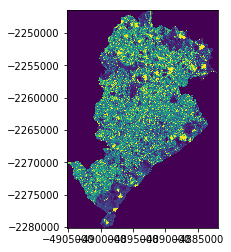

In [6]:
rioshow(red, transform=sat.transform)

* Plot all three bands

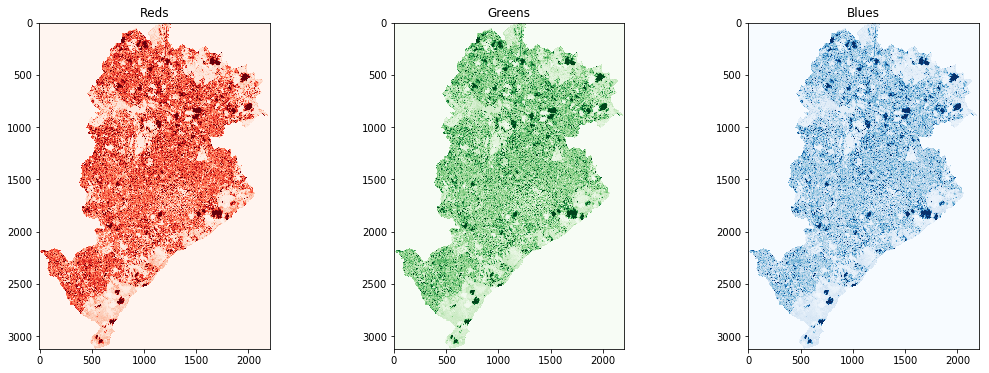

In [7]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
colors = ['Reds', 'Greens', 'Blues']
for b in range(3):
    ax = axs[b]
    band = sat.read(b+1)
    rioshow(band, ax=ax, cmap=colors[b])
    ax.set_title(colors[b])
plt.show()

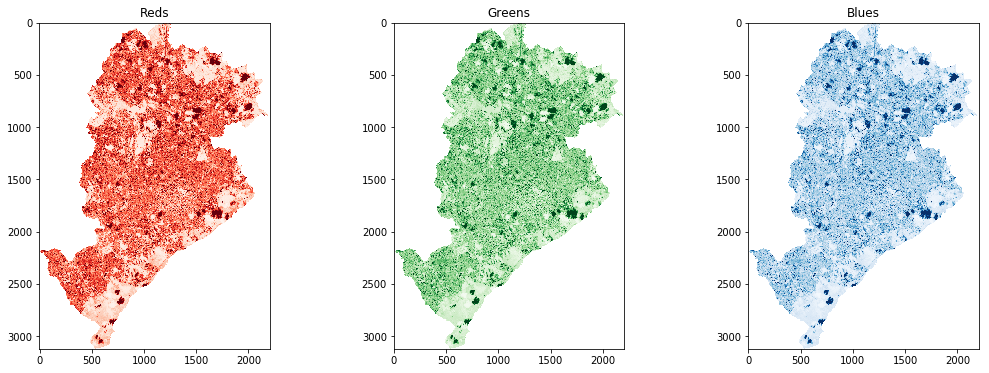

In [8]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
colors = ['Reds', 'Greens', 'Blues']
for b in range(3):
    ax = axs[b]
    band = sat.read(b+1, masked=True)
    mask = np.where(band == 0)
    band.mask[mask] = True
    rioshow(band, ax=ax, cmap=colors[b])
    ax.set_title(colors[b])
plt.show()

* Band composite

In [9]:
tri = sat.read()

In [10]:
tri.shape

(3, 3123, 2205)

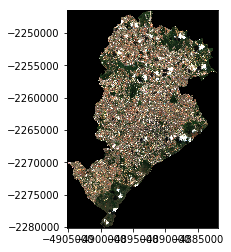

In [11]:
rioshow(tri, transform=sat.transform)

**EXERCISE** - Make a large map with the satellite image and the boundary of the Belo Horizonte Municipality overlaid

---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
